# LAB-02

# Usama Sadiq z5235652

***
## Task 1 Compute SIFT features

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
#checking the current opencv version
print(cv.__version__)

3.4.2


In [3]:
#reading the image
file_name = "syd_house.jpg"

img = cv.imread(file_name)

In [4]:
#converting the image color to gray-scale
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [5]:
#creating sift features with default parameters
sift = cv.xfeatures2d.SIFT_create()

#detect keypoints from gray-scale img
kp = sift.detect(gray,None)

In [6]:
#Draw Keypoints
img_D=cv.drawKeypoints(gray,kp,img)

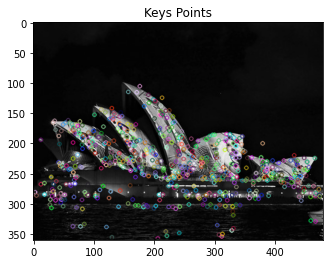

In [7]:
#Plot the Key Points
plt.title('Keys Points')
plt.imshow(img_D); plt.show()

In [8]:
#creating sift features using set number of features to reduce number of key points
sift_2 = cv.xfeatures2d.SIFT_create(nfeatures=400)
kp_2 = sift_2.detect(gray,None)

In [9]:
#Draw Keypoints
img_2=cv.drawKeypoints(gray,kp_2,img)

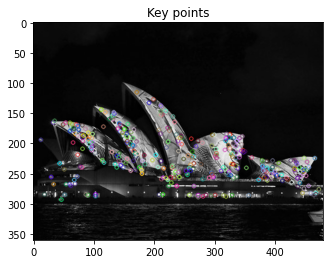

In [10]:
#Plot the Key points
plt.title('Key points')
plt.imshow(img_2); plt.show()

In [11]:
cv.imwrite('Task 1.png',img_2)

True

In [12]:
help(cv.xfeatures2d) 

Help on module cv2.xfeatures2d in cv2:

NAME
    cv2.xfeatures2d

FUNCTIONS
    BoostDesc_create(...)
        BoostDesc_create([, desc[, use_scale_orientation[, scale_factor]]]) -> retval
        .
    
    BriefDescriptorExtractor_create(...)
        BriefDescriptorExtractor_create([, bytes[, use_orientation]]) -> retval
        .
    
    DAISY_create(...)
        DAISY_create([, radius[, q_radius[, q_theta[, q_hist[, norm[, H[, interpolation[, use_orientation]]]]]]]]) -> retval
        .
    
    FREAK_create(...)
        FREAK_create([, orientationNormalized[, scaleNormalized[, patternScale[, nOctaves[, selectedPairs]]]]]) -> retval
        .   @param orientationNormalized Enable orientation normalization.
        .   @param scaleNormalized Enable scale normalization.
        .   @param patternScale Scaling of the description pattern.
        .   @param nOctaves Number of octaves covered by the detected keypoints.
        .   @param selectedPairs (Optional) user defined selected pa

***
# Task 2 Rotate the image and compute the SIFT features again

In [13]:
#reading a fresh copy of the image for rotating the image
file_name = "syd_house.jpg"

rotated = cv.imread(file_name)

In [14]:
#calculate h,w and center of the img
(h, w) = rotated.shape[:2]
(centerX, centerY) = ( w // 2, h // 2)

In [15]:
#Calculating the rotation 2D matrix using center point for angle 
#counter clockwise -255
RM = cv.getRotationMatrix2D((centerX, centerY), -255, 1.0)
rotated_1 = cv.warpAffine(rotated, RM, (w, h))

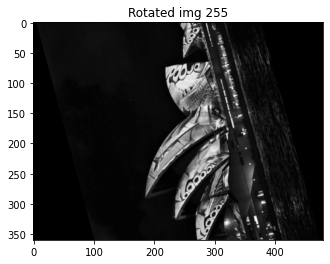

In [16]:
#Ploting the rotated image
plt.title('Rotated img 255')
plt.imshow(rotated_1); plt.show()

In [17]:
#Converting the rotated image to gray-scale image
gray_1= cv.cvtColor(rotated_1,cv.COLOR_BGR2GRAY)

In [18]:
#Creating the sift features using Task 1 parameters
sift_3 = cv.xfeatures2d.SIFT_create(nfeatures=400)

#detecing the Keypoints from gray-scale image
kp_3 = sift_3.detect(gray_1,None)

In [19]:
#Draw Keypoints
img_3=cv.drawKeypoints(gray_1,kp_3,rotated_1)

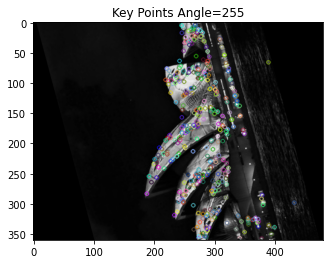

In [20]:
#Ploting Key points
plt.title('Key Points Angle=255')
plt.imshow(img_3); plt.show()

***
# Task 3 Test rotational invariance of SIFT features

In [21]:
def question3_task(filename,angle):
    #read img
    img_fun = cv.imread(filename)
    
    #calculate h,w and center of the img
    (h, w) = img_fun.shape[:2]
    (cX, cY) = ( w // 2, h // 2)
    
    #rotate the img
    M = cv.getRotationMatrix2D((cX, cY), angle, 1.0)
    rotated_f = cv.warpAffine(img_fun, M, (w, h))
    
    
    #plot the rotated img
    plt.title('Rotated img')
    plt.imshow(rotated_f); plt.show()
    
    #gray_original image
    gray_img_orig = cv.cvtColor(img_fun,cv.COLOR_BGR2GRAY)
    
    #gray_img
    gray_img= cv.cvtColor(rotated_f,cv.COLOR_BGR2GRAY)
    
    #create sift features
    sift_f = cv.xfeatures2d.SIFT_create(nfeatures=400)
    #kp_f = sift_f.detect(gray_img,None)
    
    #key points and descriptors for rotated gray img
    kp_f, dcp_f = sift_f.detectAndCompute(gray_img,None)
    
    #key points and desccriptors for orig gray img
    kp_orig_img_f , dcp_orig_img_f = sift_f.detectAndCompute(gray_img_orig,None)
    
    #Draw keypoints
    img_f=cv.drawKeypoints(gray_img,kp_f,rotated_f)
    
    #Plot Key Points Orig_Img
    plt.title('Key Points Orig_Img')
    plt.imshow(img_f); plt.show()
    
    #Default parameters for BFMatcher L2-Norm
    mat = cv.BFMatcher()
    
    #Knn Match using k = 2
    matches_found = mat.knnMatch(dcp_orig_img_f,dcp_f, k=2)
    
    #Calculate Ratio
    ratio = []
    
    for i,j in matches_found:
        if i.distance < 0.75*j.distance:
            ratio.append([i])
    
    #Draw matches Knn 
    img_final = cv.drawMatchesKnn(gray_img_orig, kp_orig_img_f, gray_img, kp_f, ratio, None, flags=2)
    
    #Plot the img
    plt.title('final_img')
    
    plt.imshow(img_final); plt.show()
    
    cv.imwrite(str(angle) + ".png" ,img_final)

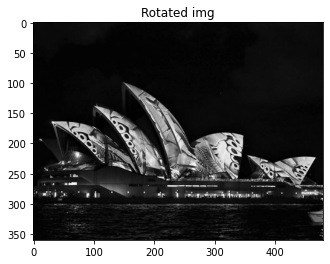

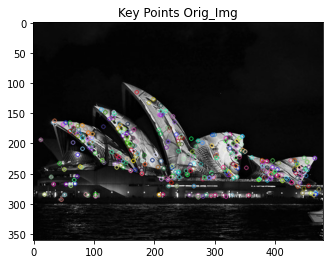

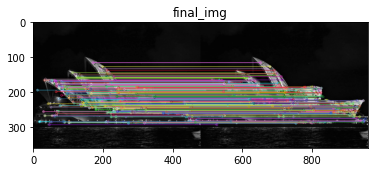

In [22]:
file_name = "syd_house.jpg"
question3_task(file_name,0)

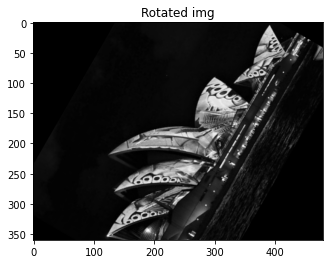

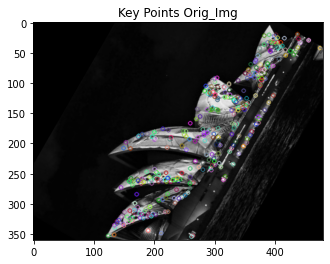

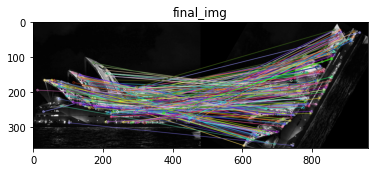

In [23]:
file_name = "syd_house.jpg"
question3_task(file_name,60)

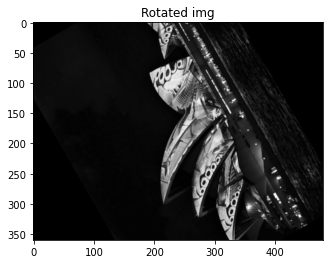

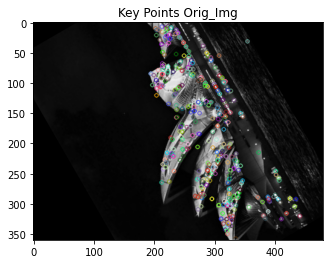

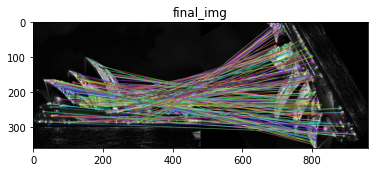

In [24]:
file_name = "syd_house.jpg"
question3_task(file_name,120)

***
# References

- Tutorial for Introduction to SIFT https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html#sift-intro

- Tutorial for Rotation of Image https://www.pyimagesearch.com/2021/01/20/opencv-rotate-image/

- Tutorial for Feature Matching https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/

- Brute-Force Matching with SIFT Descriptors and Ratio Test https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html